In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\gyanp\Downloads\insurance.csv")

In [3]:
df.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [4]:
df.shape

# The dataset has 986 records with 11 features

(986, 11)

In [5]:
df.columns

# The features of dataset are:

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [6]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
#check for missing value
df.isnull().sum().sum()

# There are no missing values

0

In [8]:
# check for duplicacy
df.duplicated().sum()

# There are no duplicate entries in dataset

0

In [9]:
# Data type inspection
df.dtypes

# Each feature is of int type

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [10]:
# Numerical features
numerical_features = ['Age', 'Height', 'Weight', 'PremiumPrice']
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
                        'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

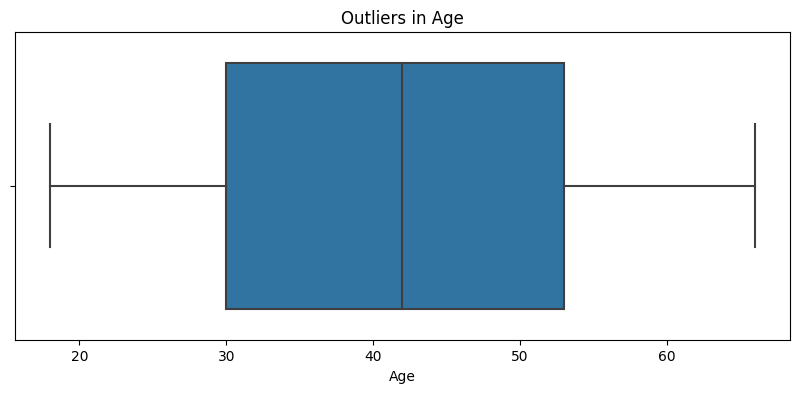

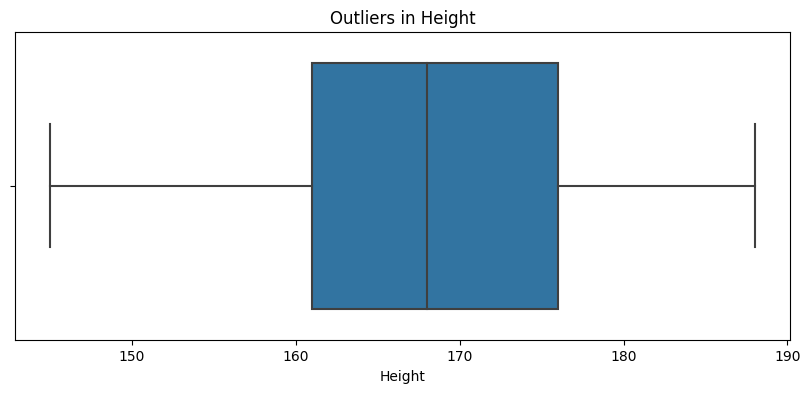

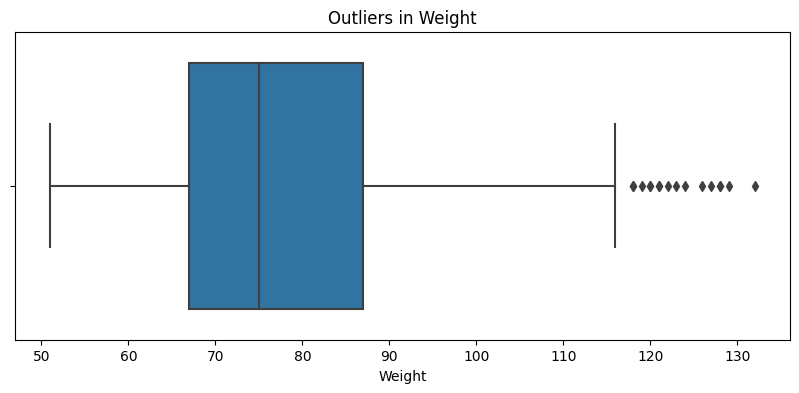

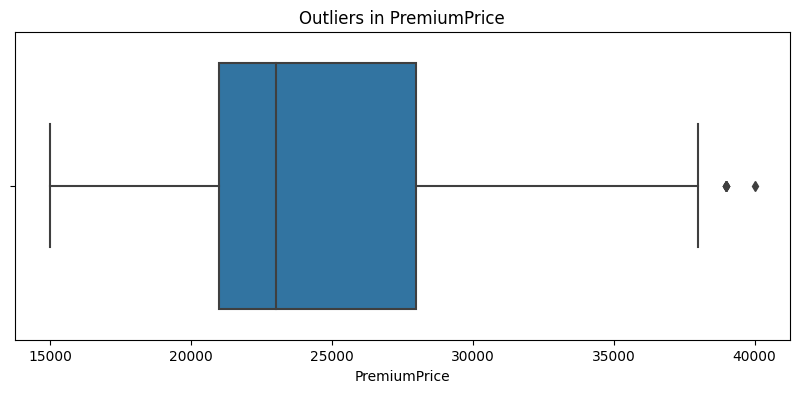

In [11]:
# Handling Outliers

# Box plots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# There are outliers in Weight and premium Price. 
# However, there are very less outliers which can be removed.

In [12]:
# Handling outliers using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
df[["Age","Height","Weight","PremiumPrice"]].describe().T

# Mean age in dataset is 41 years. The minimum and maximum age are 18 and 66 respectively.
# Mean height in dataset is 168 cm. The minimum and maximum height are 145 and 188 respectively.
# Mean weight in dataset is 76 Kg. The minimum and maximum weight are 51 and 116 respectively.

count          mean          std      min      25%      50%  \
Age           965.0     41.843523    13.876881     18.0     30.0     42.0   
Height        965.0    168.238342    10.136577    145.0    161.0    168.0   
Weight        965.0     76.191710    13.063583     51.0     67.0     75.0   
PremiumPrice  965.0  24248.704663  6128.830488  15000.0  21000.0  23000.0   

                  75%      max  
Age              53.0     66.0  
Height          176.0    188.0  
Weight           86.0    116.0  
PremiumPrice  28000.0  38000.0

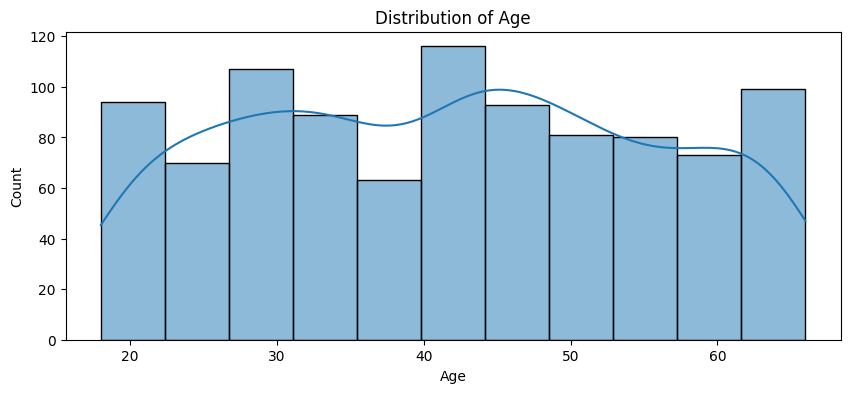

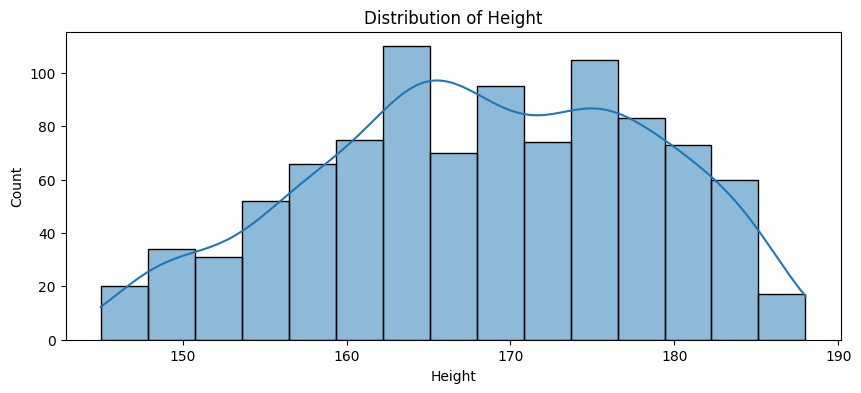

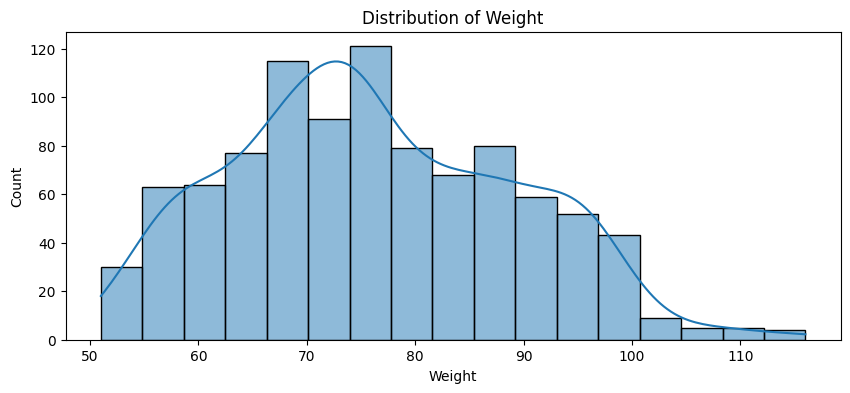

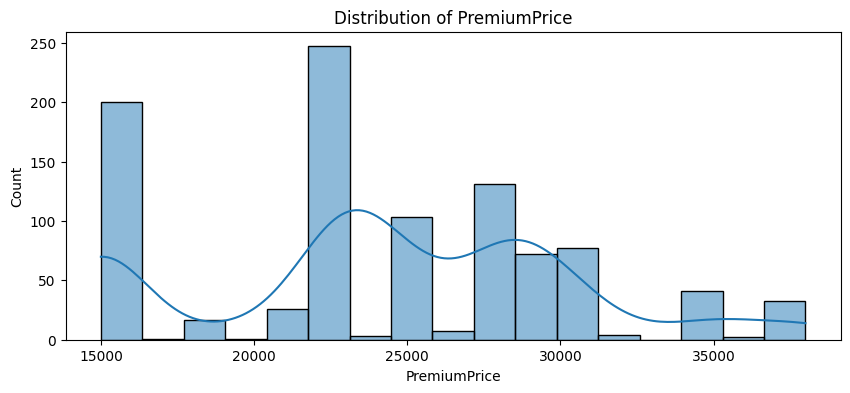

In [14]:
# Univariate Analysis

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#

In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\gyanp\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [16]:
import plotly.express as px

# Function to create count plots with percentages
def plot_count_with_percentage(df, features):
    for feature in features:
        # Calculate value counts and percentages
        counts = df[feature].value_counts().reset_index()
        counts.columns = [feature, 'Count']
        counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100

        # Create the plot
        fig = px.bar(counts, x=feature, y='Count', text='Percentage',
                     labels={feature: feature, 'Count': 'Frequency'},
                     title=f'Frequency of {feature}')

        # Update layout to show percentages on hover
        fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
        fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
        
        # Show the plot
        fig.show()

# Call the function
plot_count_with_percentage(df, categorical_features)

# There is very less difference between percentages of diabetic and non-diabetic patients.
# Similary, less percentage difference between patients having blood pressure problems and people who do not.
# Only 5.6% patients have transplant history.
# About 18.24% patients have any chronic diseases.
# About 21.45% patients are suffering from Allergy problems.
# 11.71% patients have family history of Cancer.
# 1.67% patients have undergone three surgeries, 12.02 % patients undergone two surgeries
# 37.62% patients have one surgery and 48.70% didn't go any surgery.

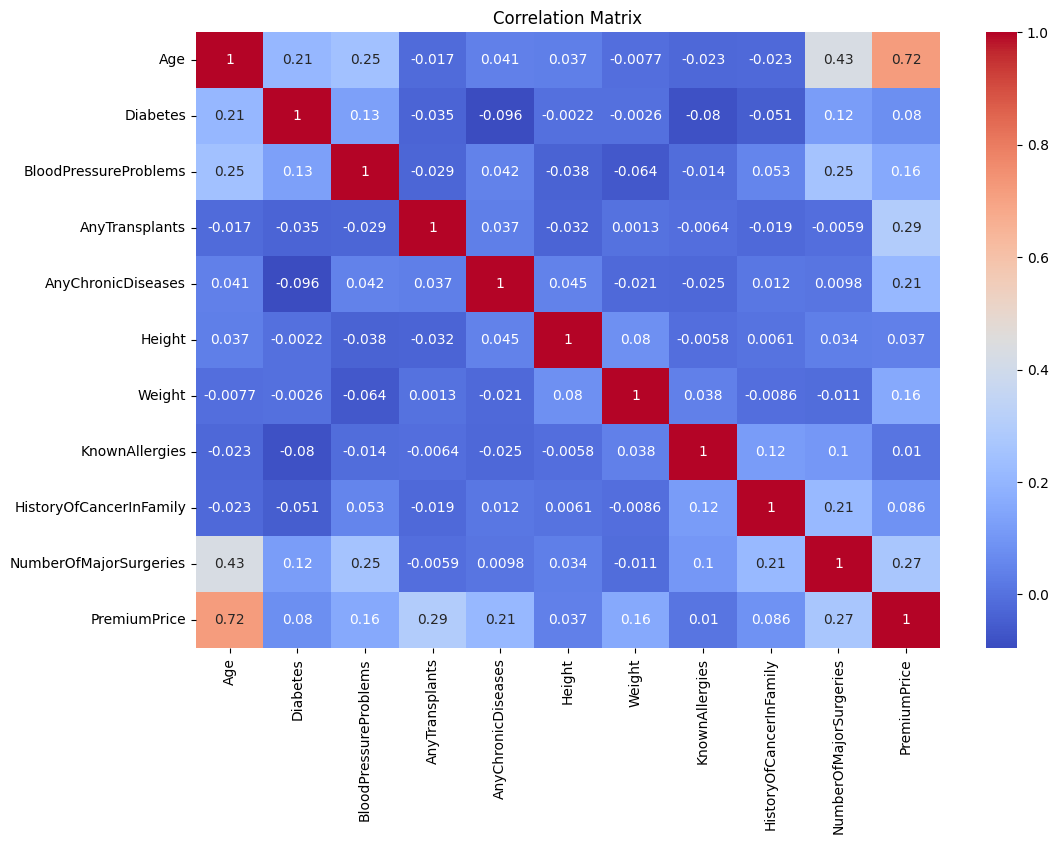

In [17]:
#Bivariate Analysis

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age is showing high correlation with Premium Price

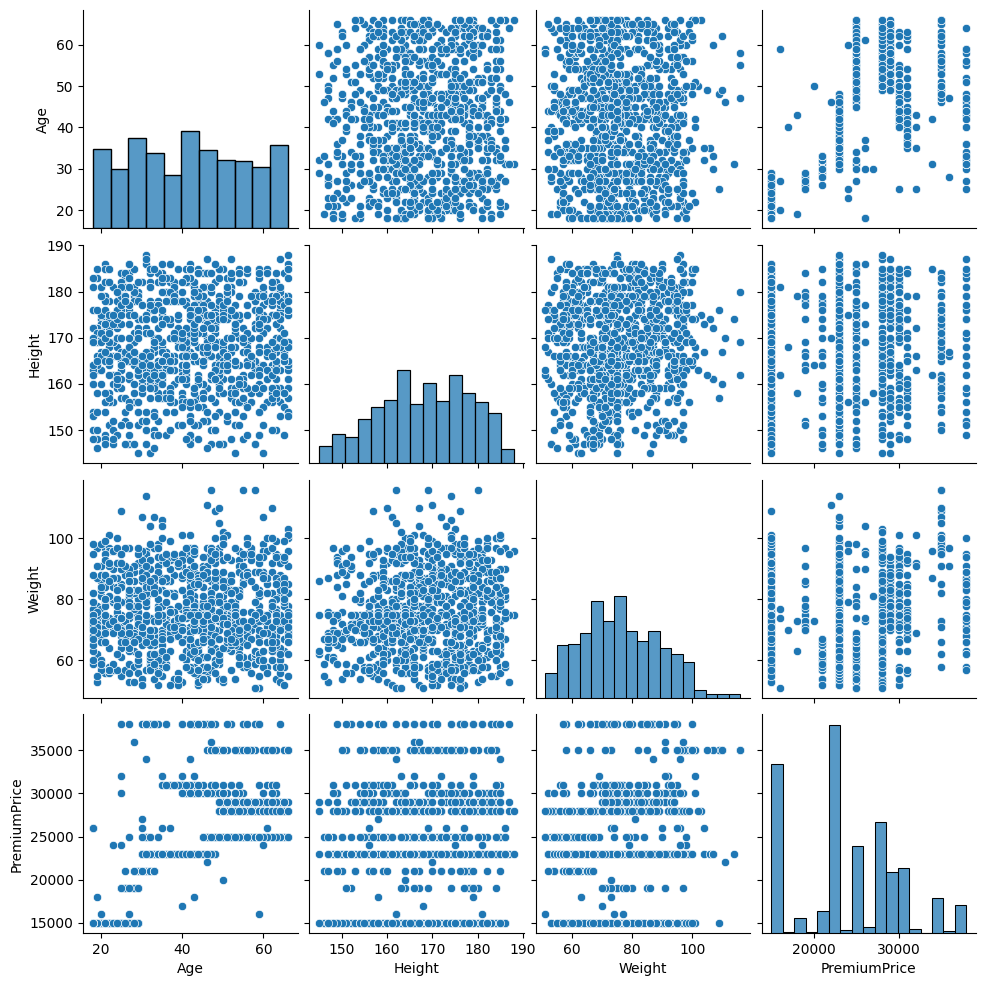

In [18]:
# Scatter plots
sns.pairplot(df, vars=['Age', 'Height', 'Weight', 'PremiumPrice'])
plt.show()

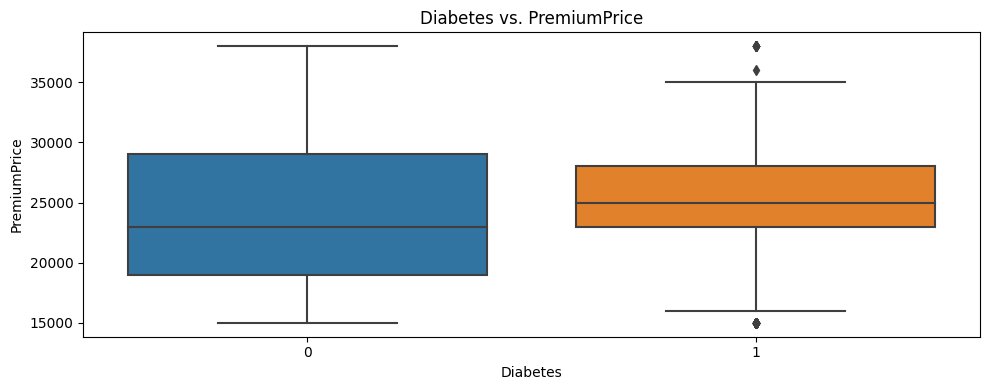

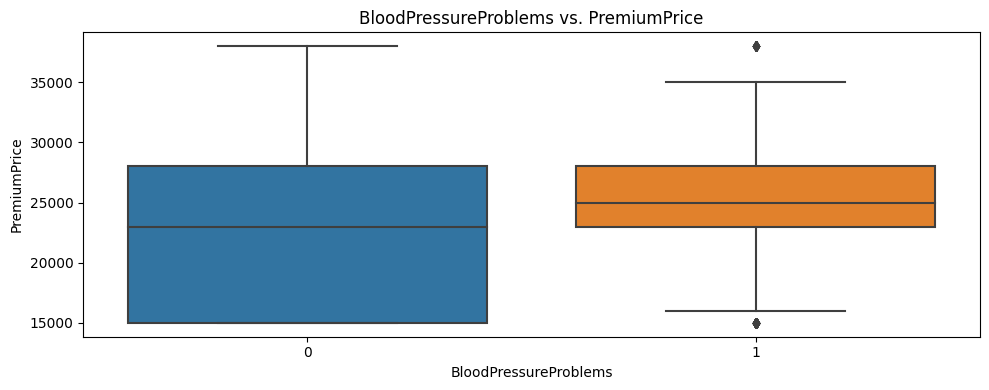

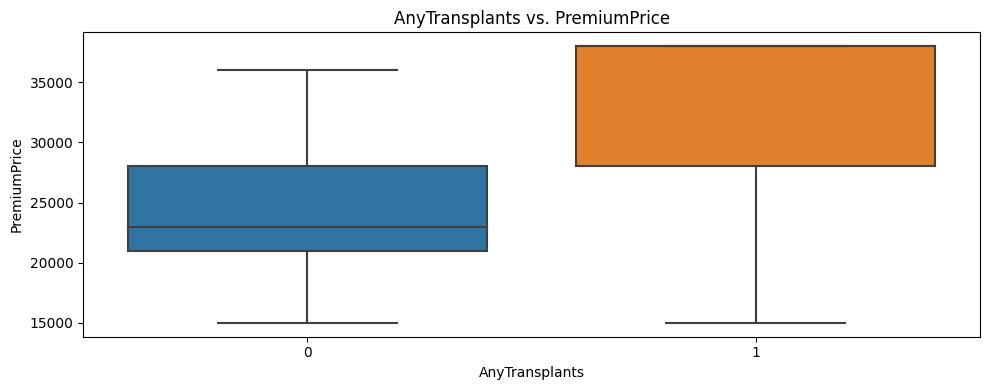

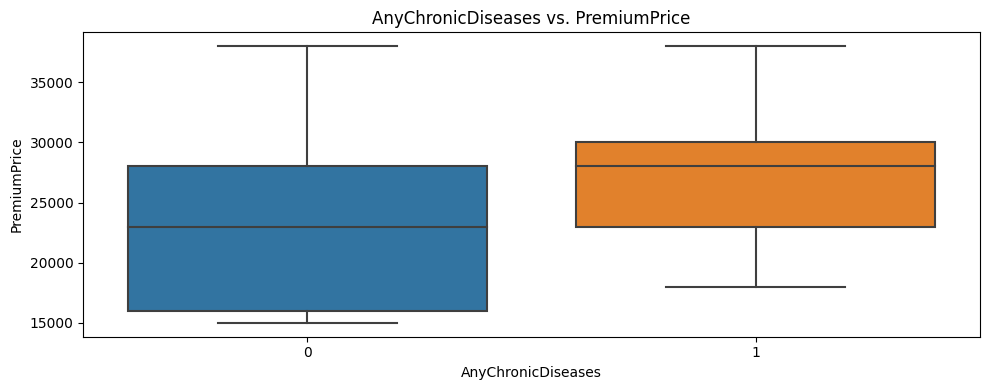

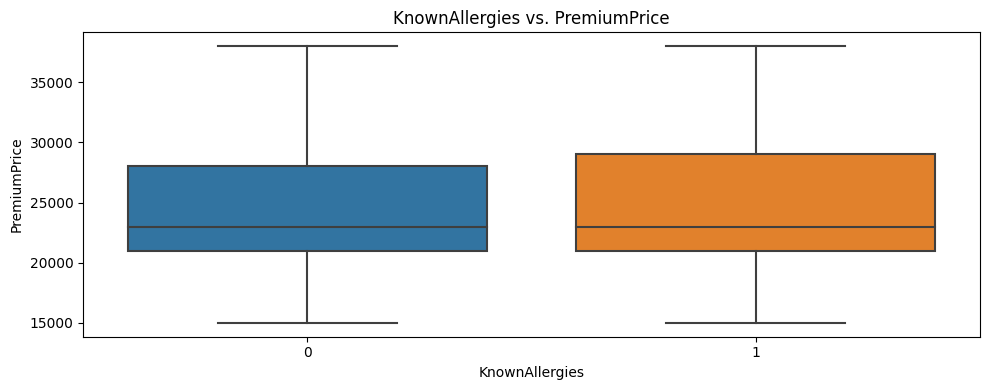

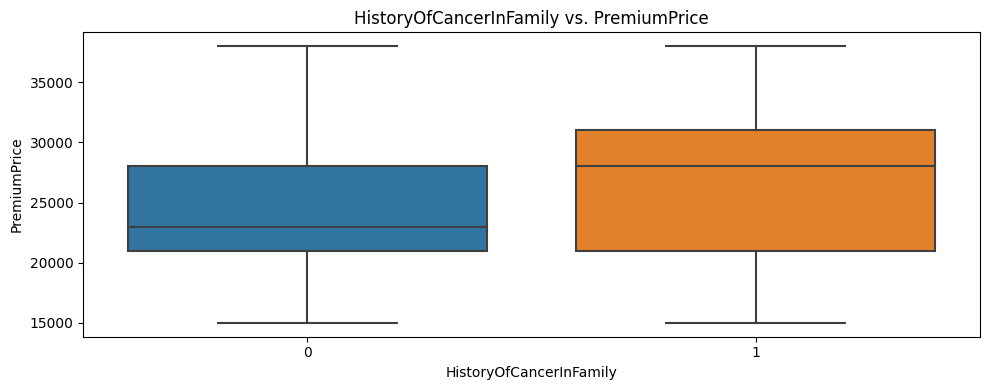

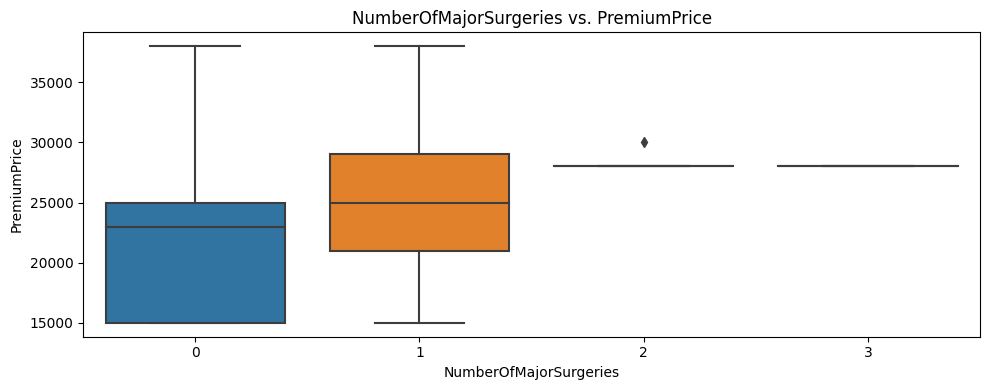

In [19]:
# Box plots for categorical vs. Premium Price
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature], y=df['PremiumPrice'])
    plt.title(f'{feature} vs. PremiumPrice')
    plt.tight_layout()
    plt.show()

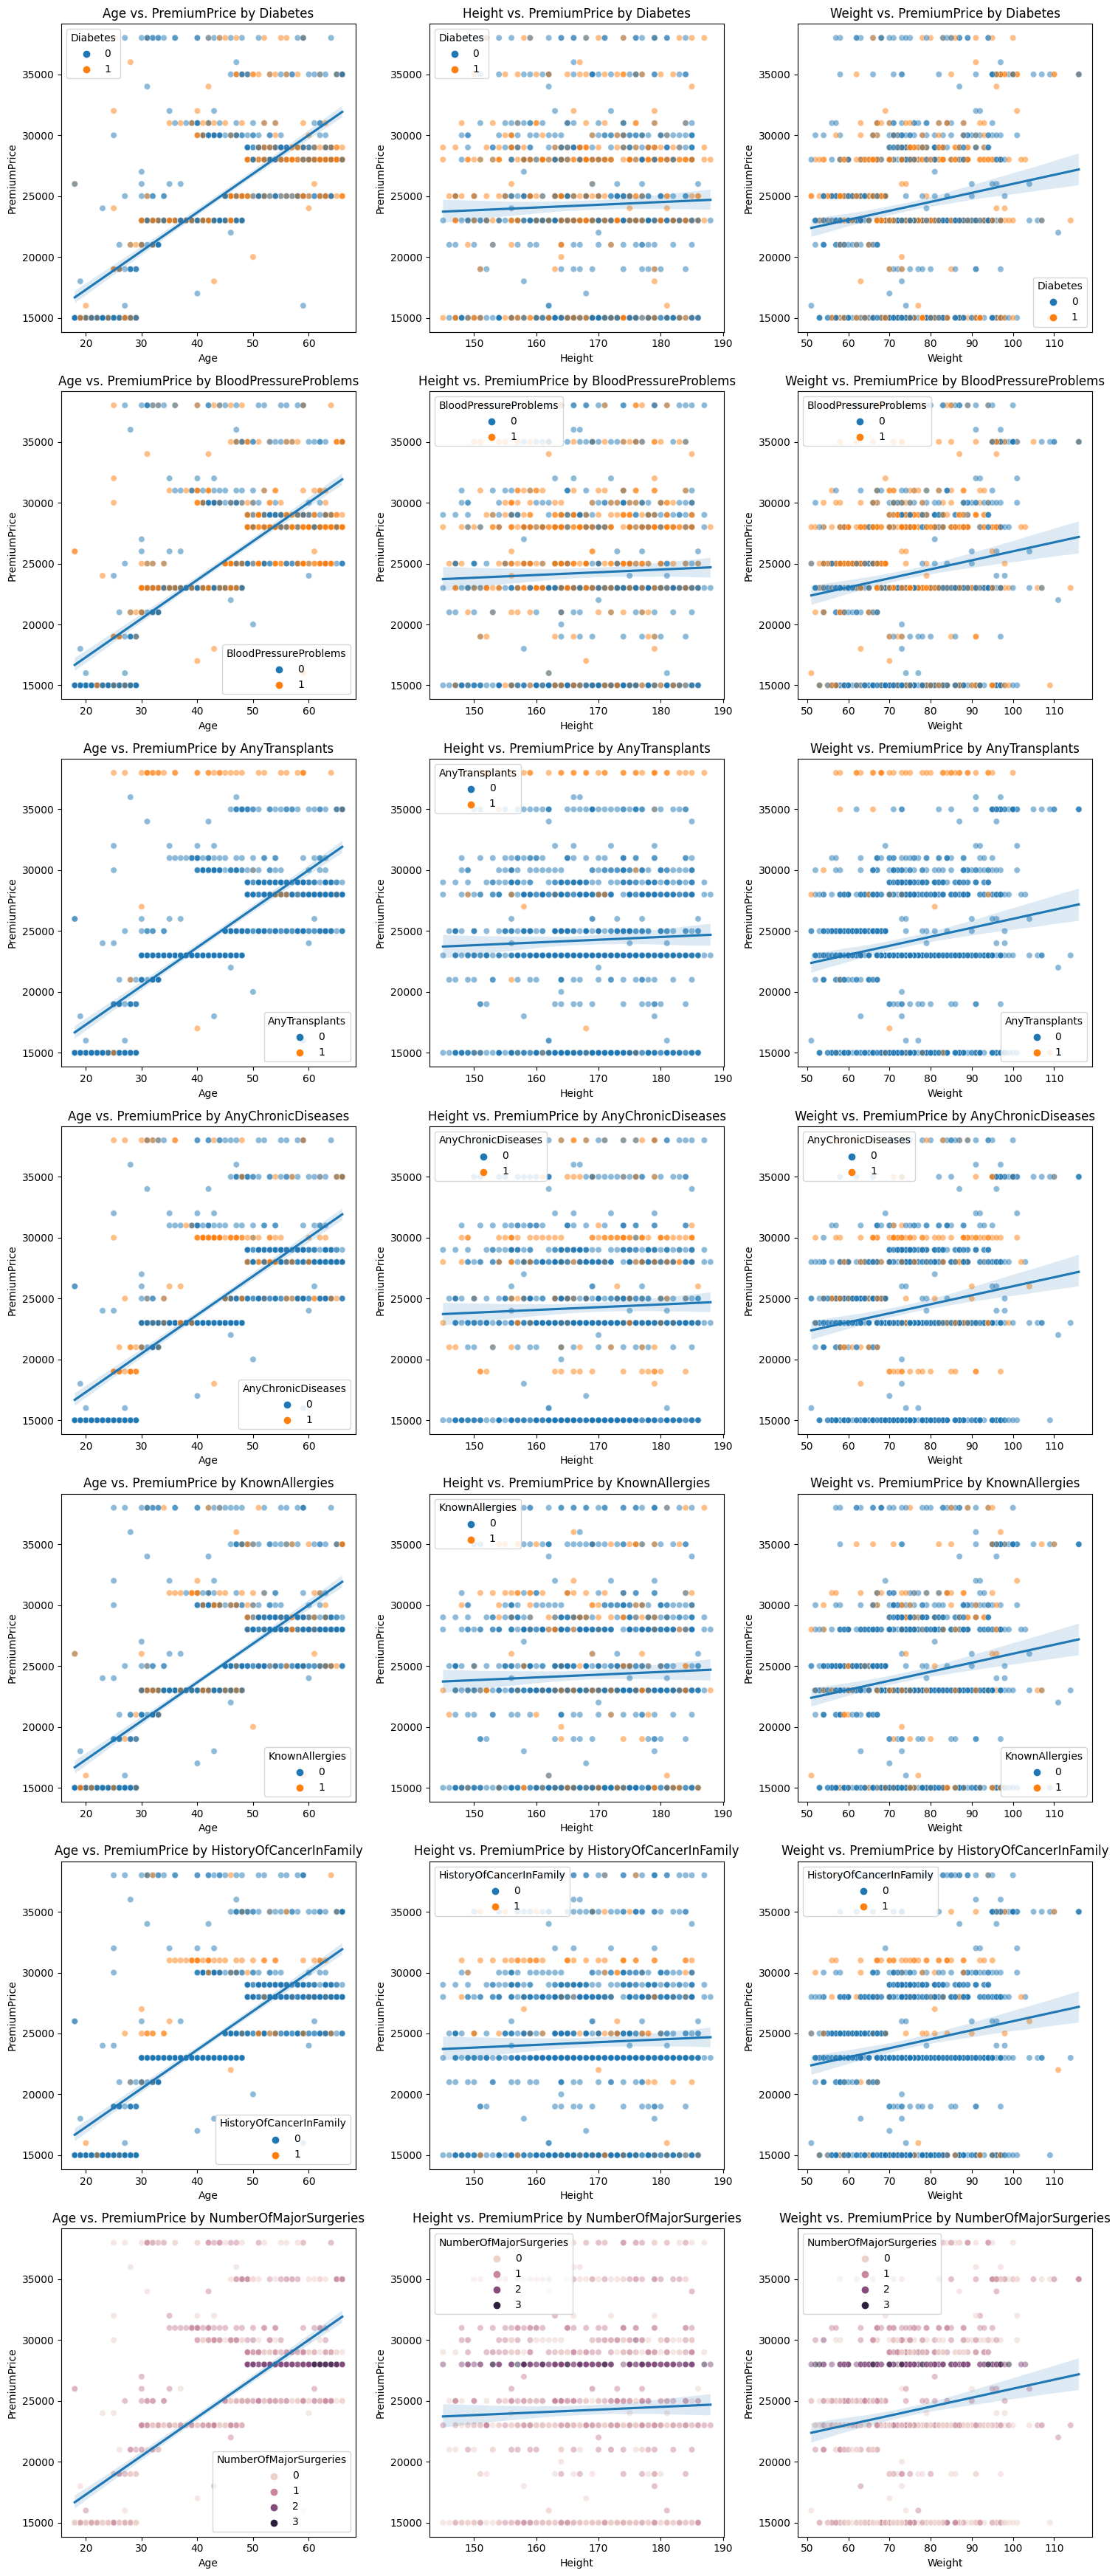

In [20]:
#Multivariate Analysis

num_features = ['Age', 'Height', 'Weight']

# Determine the grid size
n_rows = len(categorical_features)
n_cols = len(num_features)

# Create a figure with a specified size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Loop through each categorical and numerical feature and create regplots and scatterplots
for i, cat in enumerate(categorical_features):
    for j, num in enumerate(num_features):
        ax = axes[i, j]
        sns.scatterplot(x=num, y='PremiumPrice', hue=cat, data=df, ax=ax, alpha=0.5)
        sns.regplot(x=num, y='PremiumPrice', data=df, scatter=False, ax=ax)
        ax.set_title(f'{num} vs. PremiumPrice by {cat}')
        ax.set_xlabel(num)
        ax.set_ylabel('PremiumPrice')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [21]:
#Feature Engineering

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Check the new feature
print(df[['Height', 'Weight', 'BMI']].head())

   Height  Weight        BMI
0     155      57  23.725286
1     180      73  22.530864
2     158      59  23.634033
3     183      93  27.770313
4     166      88  31.934969


In [28]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.0 MB 19.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.3/11.0 MB 16.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/11.0 MB 15.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 14.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 15.5 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 15.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 15.3 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.0 MB 14.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/11.0 MB 14.1 MB/s eta 0:00:01
   ----------------------- ---------------- 6.5/11.0 MB 13.8 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\gyanp\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [29]:
# Preprocessing of Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the categorical features
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                'KnownAllergies', 'HistoryOfCancerInFamily']

# Define the numerical features
num_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

# Define the target variable
target = 'PremiumPrice'

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Preprocessing for numerical features 
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', 'passthrough', cat_features)])

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert to DataFrame for better readability (optional)
X_train_df = pd.DataFrame(X_train, columns=num_features + cat_features)
X_test_df = pd.DataFrame(X_test, columns=num_features + cat_features)

print("Preprocessed Training Data")
print(X_train_df.head())

print("Preprocessed Testing Data")
print(X_test_df.head())

Preprocessed Training Data
        Age    Height    Weight  NumberOfMajorSurgeries  Diabetes  \
0  0.462279 -1.836207 -0.700514                0.442787       1.0   
1 -1.549929  0.357991  0.746078               -0.882141       1.0   
2 -1.262471  0.357991 -0.091423                0.442787       0.0   
3  1.396519 -0.539635 -0.776651                0.442787       0.0   
4 -0.687554  1.355354 -0.472105               -0.882141       0.0   

   BloodPressureProblems  AnyTransplants  AnyChronicDiseases  KnownAllergies  \
0                    0.0             0.0                 0.0             0.0   
1                    1.0             0.0                 0.0             0.0   
2                    0.0             0.0                 0.0             0.0   
3                    1.0             0.0                 1.0             0.0   
4                    0.0             0.0                 1.0             0.0   

   HistoryOfCancerInFamily  
0                      1.0  
1                  

In [36]:
# Modeling and Evaluation
# import algorithms for model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# import metrics
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
n = len(y_test)
p = X_test.shape[1]
result_mse = {}
result_mae = {}
result_r2 ={}
result_ad_r2 = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, predictions)
    result_mse[name] = rmse
    
    mae = mean_absolute_error(y_test, predictions)
    result_mae[name] = mae
    
    r2 = r2_score(y_test, predictions)
    result_r2[name] = r2
    
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    result_ad_r2[name] = adjusted_r2


# Print the results
for name, rmse in result_mse.items():
    print(f"{name}: MSE = {rmse}")
print("------------------------------------")
for name, mae in result_mae.items():
    print(f"{name}: MAE = {mae}")
print("------------------------------------")
for name, r2 in result_r2.items():
    print(f"{name}: R2_score = {r2}")
print("------------------------------------")
for name, ad_r2 in result_ad_r2.items():
    print(f"{name}: Adjusted_R2_score = {ad_r2}")

Linear Regression: MSE = 3349.9755326626455
Decision Tree Regression: MSE = 2776.6606849929453
Random Forest Regression: MSE = 2284.163546860927
Support Vector Regression: MSE = 6368.180309424374
Gradient Boosting Regression: MSE = 1889.5396622679189
------------------------------------
Linear Regression: MAE = 2553.6623229688225
Decision Tree Regression: MAE = 715.0259067357513
Random Forest Regression: MAE = 994.8186528497409
Support Vector Regression: MAE = 4978.202166791516
Gradient Boosting Regression: MAE = 1208.250593317261
------------------------------------
Linear Regression: R2_score = 0.707728452512774
Decision Tree Regression: R2_score = 0.7992068508398544
Random Forest Regression: R2_score = 0.8641193356676604
Support Vector Regression: R2_score = -0.05617035169178597
Gradient Boosting Regression: R2_score = 0.9070144865231923
------------------------------------
Linear Regression: Adjusted_R2_score = 0.6916695762772123
Decision Tree Regression: Adjusted_R2_score = 0.7881

In [38]:
# Saving pickle file
import joblib

# Save models as pickle files
for name, model in models.items():
    joblib.dump(model, f'{name.replace(" ", "_").replace("Regression", "").lower()}_model.pkl')